In [3]:
# Import all relevant libraries that will be used for modeling and visualizations
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
%matplotlib inline

In [5]:
# Import saved datasets after EDA and pre-processing
X_train_KNNI = pd.read_parquet("data/X_train_KNNI.parquet", index_col=0)
X_test_KNNI = pd.read_parquet("data/X_test_KNNI.parquet", index_col=0)
y_test = pd.read_parquet("data/y_test.parquet", index_col=0)
y_train = pd.read_parquet("data/y_train.parquet", index_col=0)

In [6]:
# Define function to return score metrics
def model_metrics(model, X_train, y_train, X_test, y_test, name):
    
    # calculate training data metrics
    y_train_pred = model.predict(X_train)
    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    f1_train = round(f1_score(y_train, y_train_pred), 3)
    cv = round(cross_val_score(model, X_train, y_train).mean(), 3)
    
    # calculate test data metrics
    y_test_pred = model.predict(X_test)
    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    f1_test = round(f1_score(y_test, y_test_pred), 3)
    
    # print metrics
    print(f"""
    {name} Model Training Metrics:
    Accuracy Score: {accuracy_train}
    Recall Score: {recall_train}
    Precision Score: {precision_train}
    F1 Score: {f1_train}
    Cross Validation Score: {cv}
    ------
    {name} Model Test Metrics:
    Accuracy Score: {accuracy_test}
    Recall Score: {recall_test}
    Precision Score: {precision_test}
    F1 Score: {f1_test}
    """)
    
    # plot confusion matrices & roc curves
    print(f"{name} Model Training Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_train, y_train, cmap='rocket'))
    print(f"{name} Model Training ROC Curve")
    plt.show(plot_roc_curve(model, X_train, y_train))
    print(f"{name} Model Test Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_test, y_test, cmap='rocket'))
    print(f"{name} Model Test ROC Curve")
    plt.show(plot_roc_curve(model, X_test, y_test))

In [7]:
# Dummy Classifier Model
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train_KNNI, y_train)

C:\Users\danie\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(random_state=42)

C:\Users\danie\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "



    Dummy Model Training Metrics:
    Accuracy Score: 0.667
    Recall Score: 0.206
    Precision Score: 0.206
    F1 Score: 0.206
    Cross Validation Score: 0.669
    ------
    Dummy Model Test Metrics:
    Accuracy Score: 0.668
    Recall Score: 0.201
    Precision Score: 0.201
    F1 Score: 0.201
    
Dummy Model Training Confusion Matrix


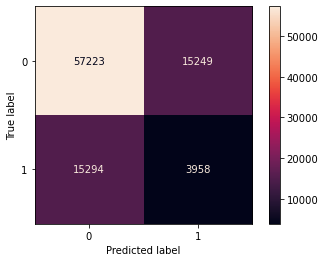

Dummy Model Training ROC Curve


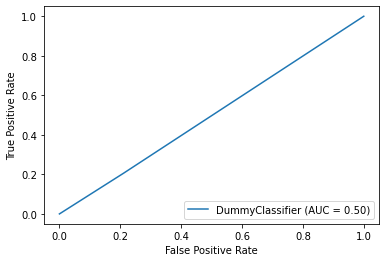

Dummy Model Test Confusion Matrix


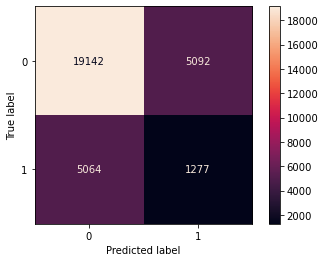

Dummy Model Test ROC Curve


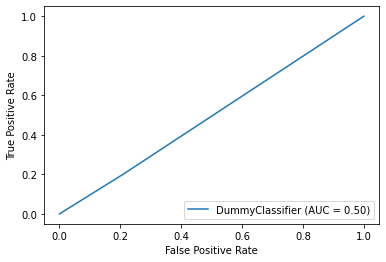

In [70]:
model_metrics(baseline, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'Dummy')

In [8]:
# Logistic Regression Pipeline
lr_pipe = imPipeline(steps=[
                        ('scaler', StandardScaler()),
                        ('smote', SMOTE()),
                        ('lr', LogisticRegression(random_state=42))])

lr_grid = {'lr__tol':[.01, .0001],
           'lr__C':[10, 1, .1],
           'lr__class_weight':[None, 'balanced']}

In [9]:
lr_gs = GridSearchCV(estimator=lr_pipe, 
                    param_grid=lr_grid,
                    cv=3)

lr_gs.fit(X_train_KNNI, np.ravel(y_train))

lr_best = lr_gs.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total=  49.4s
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.3s remaining:    0.0s


[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total=  50.7s
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................
[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total=  49.7s
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................
[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total=  49.0s
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................
[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total=  49.5s
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.0001 .................
[CV] .. lr__C=10, lr__class_weight=None, lr__tol=0.0001, total=  48.6s
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.0001 .................
[CV] .. lr__C=10, lr__class_weight=None, lr__tol=0.0001, total=  48.9s
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.0001 .................
[CV] .. lr__C=10, lr__class_weight=None, lr__tol=0.0001, total=  45.4s
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.0001 .................
[CV] .

[CV]  lr__C=0.1, lr__class_weight=balanced, lr__tol=0.0001, total=  46.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 45.2min finished


NameError: name 'lr_gs' is not defined

In [10]:
lr_best = lr_gs.best_estimator_

In [11]:
lr_best

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('lr', LogisticRegression(C=10, random_state=42, tol=0.01))])


    LogRegBest Model Training Metrics:
    Accuracy Score: 0.785
    Recall Score: 0.767
    Precision Score: 0.492
    F1 Score: 0.6
    Cross Validation Score: 0.784
    ------
    LogRegBest Model Test Metrics:
    Accuracy Score: 0.787
    Recall Score: 0.766
    Precision Score: 0.491
    F1 Score: 0.599
    
LogRegBest Model Training Confusion Matrix


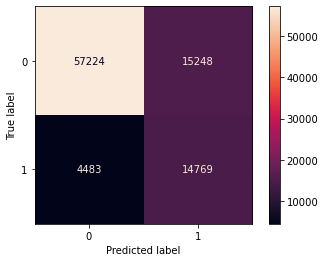

LogRegBest Model Training ROC Curve


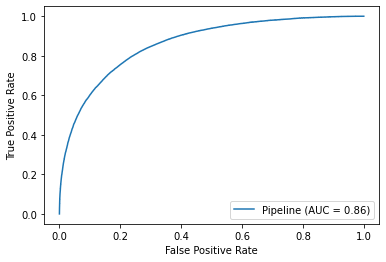

LogRegBest Model Test Confusion Matrix


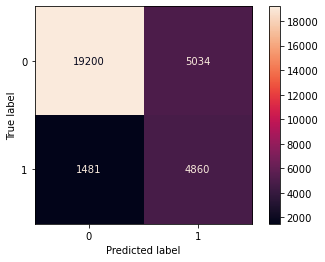

LogRegBest Model Test ROC Curve


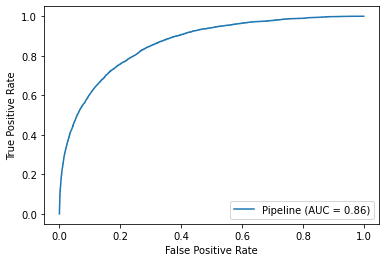

In [15]:
model_metrics(lr_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'LogRegBest')

In [45]:
# Decision Tree Pipeline
dt_pipe = Pipeline(steps=[('dt', DecisionTreeClassifier(random_state=42))])

dt_grid = {'dt__max_depth': [5, 7, 9],
        'dt__min_samples_split': [2, 5],
        'dt__min_samples_leaf': [1, 5]}

In [46]:
dt_gs = GridSearchCV(estimator=dt_pipe,
                    param_grid=dt_grid,
                    cv=3)

dt_gs.fit(X_train_KNNI, np.ravel(y_train))

dt_best = dt_gs.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2 
[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5 
[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5 
[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5 
[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=2 
[CV]  dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=2, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=2 
[CV]  dt__max_depth=5, dt__min_samples_leaf=5, dt__min_sam

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   20.3s finished


In [47]:
dt_best

Pipeline(steps=[('dt', DecisionTreeClassifier(max_depth=7, random_state=42))])


    DecTreeBest Model Training Metrics:
    Accuracy Score: 0.846
    Recall Score: 0.428
    Precision Score: 0.727
    F1 Score: 0.539
    Cross Validation Score: 0.84
    ------
    DecTreeBest Model Test Metrics:
    Accuracy Score: 0.844
    Recall Score: 0.422
    Precision Score: 0.707
    F1 Score: 0.528
    
DecTreeBest Model Training Confusion Matrix


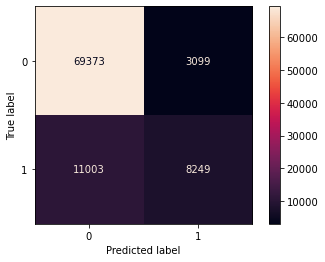

DecTreeBest Model Training ROC Curve


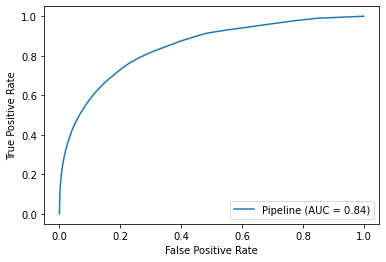

DecTreeBest Model Test Confusion Matrix


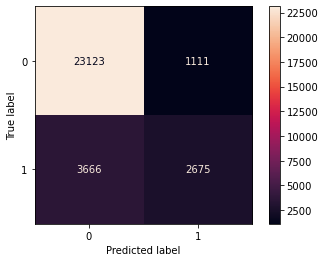

DecTreeBest Model Test ROC Curve


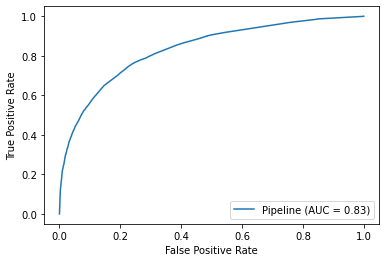

In [48]:
model_metrics(dt_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'DecTreeBest')

## Advanced Models

In [49]:
# Random Forest Pipeline
rf_pipe = Pipeline(steps=[('rf', RandomForestClassifier(random_state=42))])

rf_grid = {'rf__max_depth': [5, 7, 9],
          'rf__min_samples_split': [2, 5],
          'rf__min_samples_leaf': [1, 5]}

rf_gs = GridSearchCV(estimator=rf_pipe,
                    param_grid=rf_grid,
                    cv=3)

rf_gs.fit(X_train_KNNI, np.ravel(y_train))

rf_best = rf_gs.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, total=   2.8s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, total=   2.7s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2 
[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, total=   2.7s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5 
[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5, total=   2.9s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5 
[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5, total=   2.8s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5 
[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5, total=   2.7s
[CV] rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=2 
[CV]  rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=2, total=   2.7s
[CV] rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=2 
[CV]  rf__max_depth=5, rf__min_samples_leaf=5, rf__min_sam

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.3min finished


In [50]:
rf_best

Pipeline(steps=[('rf', RandomForestClassifier(max_depth=9, random_state=42))])


    RanForBest Model Training Metrics:
    Accuracy Score: 0.848
    Recall Score: 0.351
    Precision Score: 0.828
    F1 Score: 0.493
    Cross Validation Score: 0.841
    ------
    RanForBest Model Test Metrics:
    Accuracy Score: 0.843
    Recall Score: 0.337
    Precision Score: 0.786
    F1 Score: 0.472
    
RanForBest Model Training Confusion Matrix


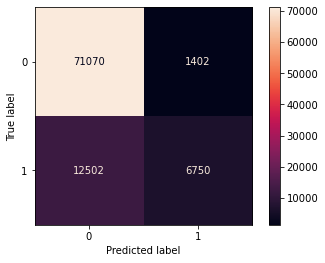

RanForBest Model Training ROC Curve


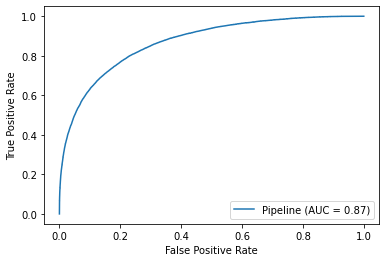

RanForBest Model Test Confusion Matrix


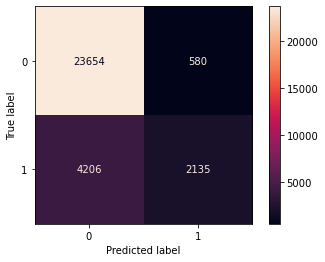

RanForBest Model Test ROC Curve


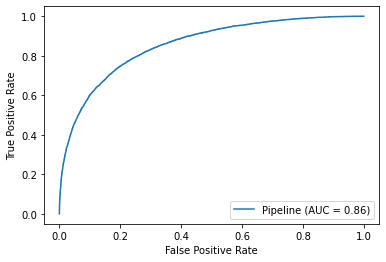

In [51]:
model_metrics(rf_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'RanForBest')

In [54]:
gbc_pipe = Pipeline(steps=[('gbc', GradientBoostingClassifier(random_state=42))])

gbc_grid = {'gbc__learning_rate': [.1, .3, .5],
           'gbc__min_samples_split': [2, 5],
           'gbc__min_samples_leaf': [1, 5]}

In [55]:
gbc_gs = GridSearchCV(estimator=gbc_pipe,
                    param_grid=gbc_grid,
                    cv=3)

gbc_gs.fit(X_train_KNNI, np.ravel(y_train))

gbc_best = gbc_gs.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2, total=  19.7s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.6s remaining:    0.0s


[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2, total=  20.0s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2, total=  20.0s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5, total=  20.5s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5, total=  21.9s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5, total=  22.8s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=5, gbc__min_samples_split=2 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=5, gbc__min_samples_split=2, total=  21.7s
[CV] gbc__learning_rate=0.1, g

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 12.5min finished


In [57]:
gbc_best

Pipeline(steps=[('gbc',
                 GradientBoostingClassifier(learning_rate=0.3,
                                            min_samples_leaf=5,
                                            random_state=42))])


    GBCBest Model Training Metrics:
    Accuracy Score: 0.861
    Recall Score: 0.502
    Precision Score: 0.754
    F1 Score: 0.602
    Cross Validation Score: 0.854
    ------
    GBCBest Model Test Metrics:
    Accuracy Score: 0.856
    Recall Score: 0.492
    Precision Score: 0.724
    F1 Score: 0.585
    
GBCBest Model Training Confusion Matrix


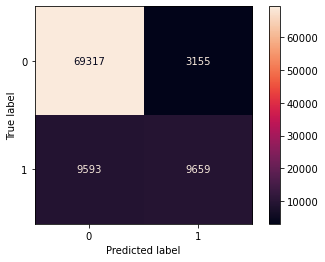

GBCBest Model Training ROC Curve


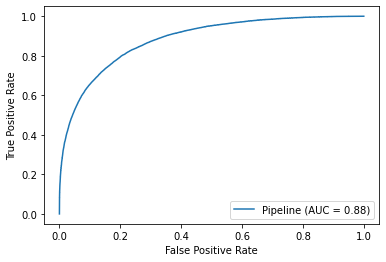

GBCBest Model Test Confusion Matrix


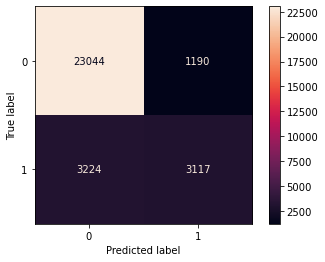

GBCBest Model Test ROC Curve


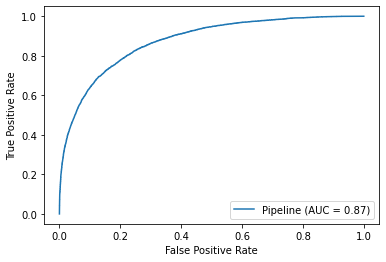

In [58]:
model_metrics(gbc_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'GBCBest')

In [59]:
xgb_pipe = Pipeline(steps=[('xgb', XGBClassifier(objective='binary:logistic', random_state=42))])

xgb_grid = {'xgb__max_depth': [6,8,10],
           'xgb__tree_method': ['auto','hist'],
           'xgb__learning_rate': [.1, .3, .5]}

In [60]:
xgb_gs = GridSearchCV(estimator=xgb_pipe,
                    param_grid=xgb_grid,
                    cv=3)

xgb_gs.fit(X_train_KNNI, np.ravel(y_train))

xgb_best = xgb_gs.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=auto .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=auto, total=   5.1s
[CV] xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=auto .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=auto, total=   4.6s
[CV] xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=auto .
[CV]  xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=auto, total=   5.3s
[CV] xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=hist .
[CV]  xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=hist, total=   1.5s
[CV] xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=hist .
[CV]  xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=hist, total=   1.2s
[CV] xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=hist .
[CV]  xgb__learning_rate=0.1, xgb__max_depth=6, xgb__tree_method=hist, total=   1.2s
[CV] xgb__learning_rate=0.1, xgb__max_depth=8, xgb__tree_method=auto .
[CV]  xgb__learning_rate=0.1, xgb__max_depth=8, xgb__tree_method=auto, total=   6.0s
[CV] xgb__learning_rate=0.1, xgb__max_depth=8, xgb__tree_method=auto .
[CV]  xgb__learning_rate=0.1, xgb__max_depth=8, xgb__tree_method

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  3.3min finished


In [61]:
xgb_best

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='hist',
                               validate_parameters=1, verbosity=None))])


    XGBBest Model Training Metrics:
    Accuracy Score: 0.922
    Recall Score: 0.684
    Precision Score: 0.922
    F1 Score: 0.786
    Cross Validation Score: 0.857
    ------
    XGBBest Model Test Metrics:
    Accuracy Score: 0.862
    Recall Score: 0.513
    Precision Score: 0.74
    F1 Score: 0.606
    
XGBBest Model Training Confusion Matrix


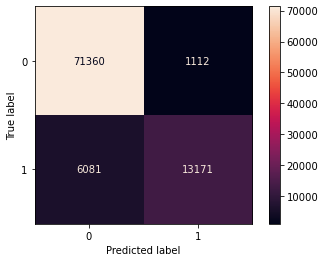

XGBBest Model Training ROC Curve


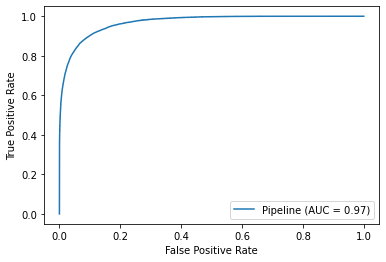

XGBBest Model Test Confusion Matrix


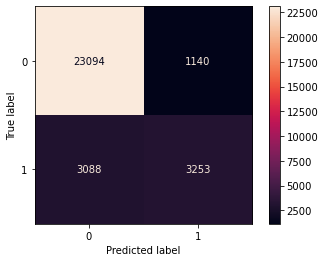

XGBBest Model Test ROC Curve


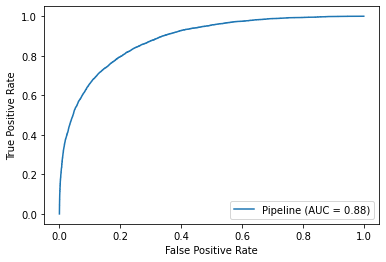

In [62]:
model_metrics(xgb_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'XGBBest')

In [8]:
xgb2_pipe = Pipeline(steps=[('xgb2', XGBClassifier(objective='binary:logistic', random_state=42, learning_rate=0.1, tree_method='hist'))])

xgb2_grid = {'xgb2__max_depth': [3, 5, 8],
           'xgb2__colsample_bytree': [.3, .5, .8, 1],
             'xgb2__subsample': [.3, .5, .8, 1]}

In [9]:
xgb2_gs = GridSearchCV(estimator=xgb2_pipe,
                    param_grid=xgb2_grid,
                    cv=3)

xgb2_gs.fit(X_train_KNNI, np.ravel(y_train))

xgb2_best = xgb2_gs.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.3, total=   1.6s
[CV] xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.3, total=   1.3s
[CV] xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.3 
[CV]  xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.3, total=   1.4s
[CV] xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.5 
[CV]  xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.5, total=   1.5s
[CV] xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.5 
[CV]  xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.5, total=   1.6s
[CV] xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.5 
[CV]  xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.5, total=   1.5s
[CV] xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.8 
[CV]  xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.8, total=   1.6s
[CV] xgb2__colsample_bytree=0.3, xgb2__max_depth=3, xgb2__subsample=0.8 
[CV]  xgb2__colsample_bytree=0.3, 

[CV]  xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=0.5, total=   3.6s
[CV] xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=0.8 
[CV]  xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=0.8, total=   2.0s
[CV] xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=0.8 
[CV]  xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=0.8, total=   1.9s
[CV] xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=0.8 
[CV]  xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=0.8, total=   1.9s
[CV] xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=1 
[CV]  xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=1, total=   1.3s
[CV] xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=1 
[CV]  xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=1, total=   1.3s
[CV] xgb2__colsample_bytree=0.5, xgb2__max_depth=5, xgb2__subsample=1 
[CV]  xgb2__colsample_bytree=0.5, xgb2__max_

[CV]  xgb2__colsample_bytree=0.8, xgb2__max_depth=8, xgb2__subsample=1, total=   1.7s
[CV] xgb2__colsample_bytree=0.8, xgb2__max_depth=8, xgb2__subsample=1 
[CV]  xgb2__colsample_bytree=0.8, xgb2__max_depth=8, xgb2__subsample=1, total=   2.5s
[CV] xgb2__colsample_bytree=0.8, xgb2__max_depth=8, xgb2__subsample=1 
[CV]  xgb2__colsample_bytree=0.8, xgb2__max_depth=8, xgb2__subsample=1, total=   3.4s
[CV] xgb2__colsample_bytree=1, xgb2__max_depth=3, xgb2__subsample=0.3 
[CV]  xgb2__colsample_bytree=1, xgb2__max_depth=3, xgb2__subsample=0.3, total=   1.5s
[CV] xgb2__colsample_bytree=1, xgb2__max_depth=3, xgb2__subsample=0.3 
[CV]  xgb2__colsample_bytree=1, xgb2__max_depth=3, xgb2__subsample=0.3, total=   1.5s
[CV] xgb2__colsample_bytree=1, xgb2__max_depth=3, xgb2__subsample=0.3 
[CV]  xgb2__colsample_bytree=1, xgb2__max_depth=3, xgb2__subsample=0.3, total=   1.4s
[CV] xgb2__colsample_bytree=1, xgb2__max_depth=3, xgb2__subsample=0.5 
[CV]  xgb2__colsample_bytree=1, xgb2__max_depth=3, xgb2__s

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  4.3min finished


In [10]:
xgb2_best

Pipeline(steps=[('xgb2',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='hist',
                               validate_parameters=1, verbosity=None))])


    XGB2Best Model Training Metrics:
    Accuracy Score: 0.888
    Recall Score: 0.574
    Precision Score: 0.841
    F1 Score: 0.682
    Cross Validation Score: 0.858
    ------
    XGB2Best Model Test Metrics:
    Accuracy Score: 0.862
    Recall Score: 0.504
    Precision Score: 0.747
    F1 Score: 0.602
    
XGB2Best Model Training Confusion Matrix


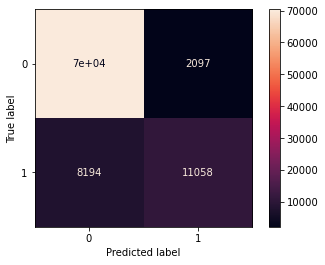

XGB2Best Model Training ROC Curve


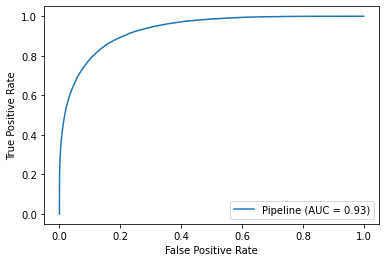

XGB2Best Model Test Confusion Matrix


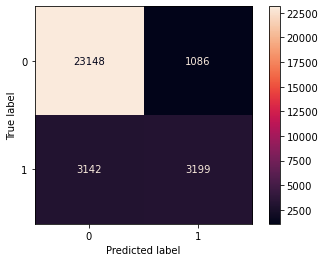

XGB2Best Model Test ROC Curve


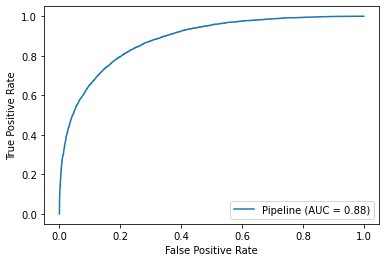

In [66]:
model_metrics(xgb2_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'XGB2Best')

## Vizualations

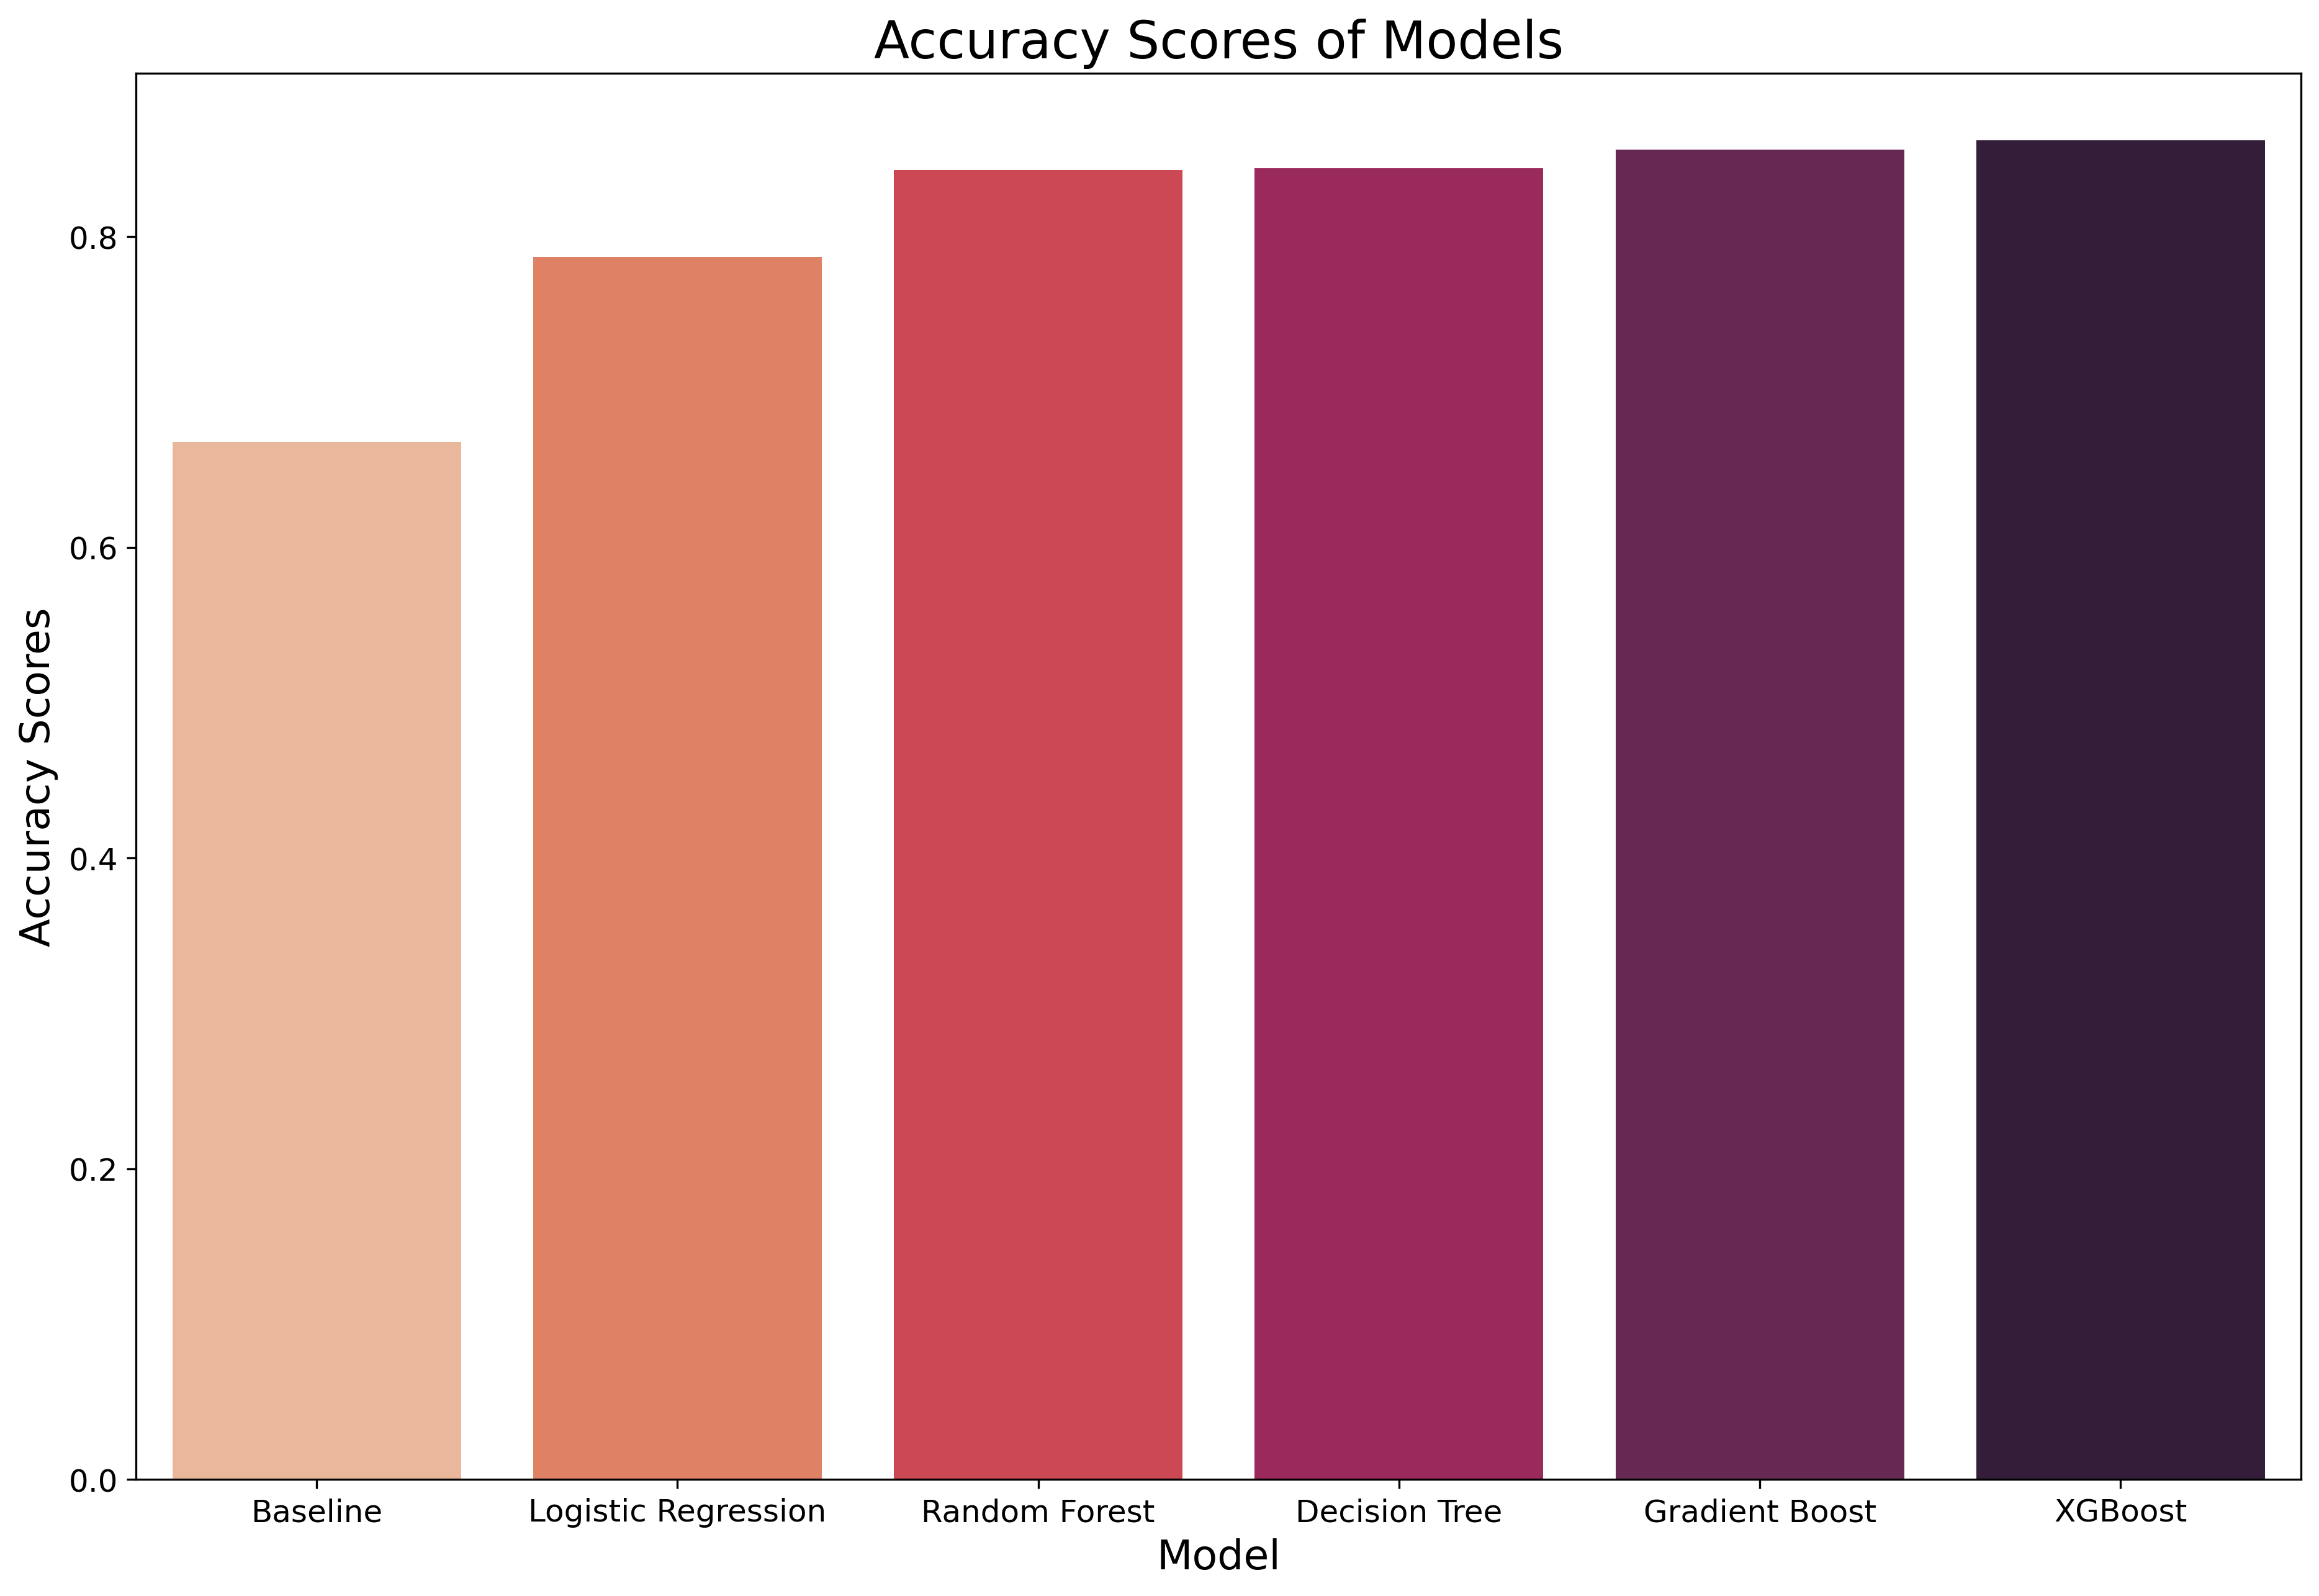

In [4]:
acc_scores = pd.DataFrame({'model':['Baseline', 'Logistic Regression', 'Random Forest',
                                    'Decision Tree', 'Gradient Boost', 'XGBoost'],
                           'accuracy':[0.668, 0.787, 0.843, 0.844, 0.856, 0.862]})

plt.figure(figsize=(15,10), dpi=300)
sns.barplot(x='model', y='accuracy', data=acc_scores, palette='rocket_r')
plt.title("Accuracy Scores of Models", fontsize=20)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy Scores', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

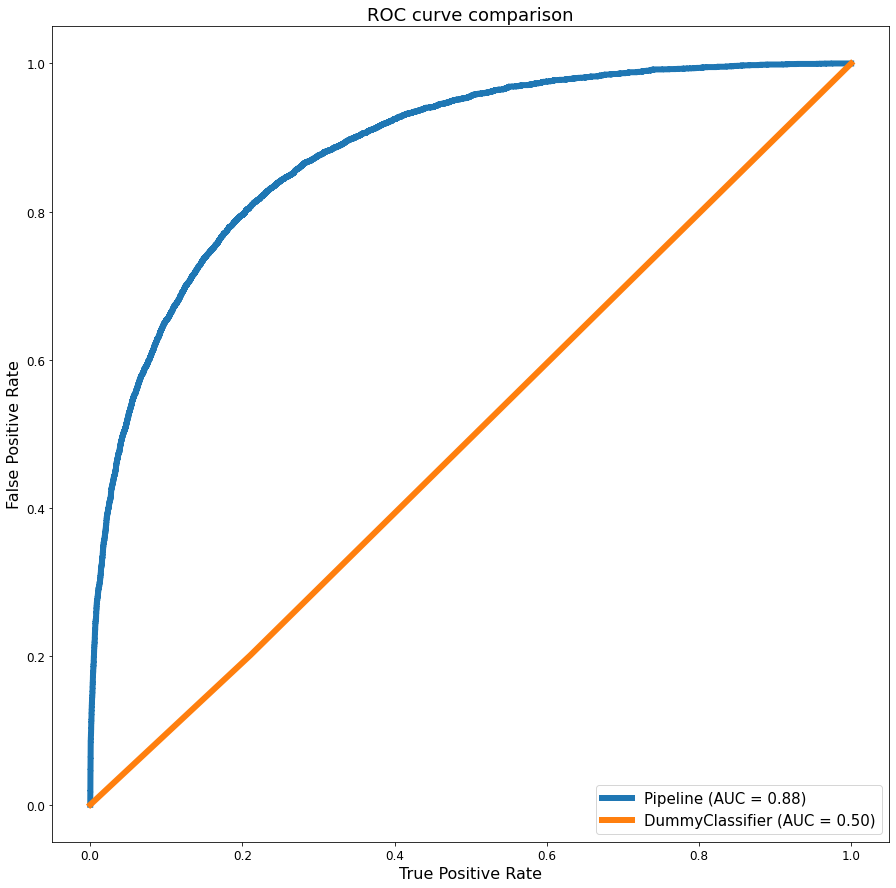

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_roc_curve(xgb2_best, X_test_KNNI, y_test, ax=ax, linewidth=6)
plot_roc_curve(baseline, X_test_KNNI, y_test, ax=ax, linewidth=6)
ax.set_title('ROC curve comparison', fontsize=18)
ax.set_xlabel('True Positive Rate', fontsize=16)
ax.set_ylabel('False Positive Rate', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=4, prop={'size': 15})
plt.show();